In [5]:
!pip install yfinance


  Using cached yfinance-0.2.41-py2.py3-none-any.whl.metadata (11 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.17.6.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached yfinance-0.2.41-py2.py3-none-any.whl (73 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138938 sha256=6c92870c5f958a37c5588a95063bb87c453048749219951c78a7fb952127373c
  Stored in directory: c:\users\devisha\appdata\local\pip\cache\wheels\1c\09\7e\9f659fde248ecdc

In [103]:
import yfinance as yf
import os
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")
#sp500= yf.Ticker("^GSPC")

In [104]:
sp500.index = pd.to_datetime(sp500.index)
#sp500= sp500.history(period="max")

C:\Users\Devisha\AppData\Local\Temp\ipykernel_13752\1796831910.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  sp500.index = pd.to_datetime(sp500.index)


In [105]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-29 00:00:00-04:00,5476.549805,5487.740234,5444.439941,5463.540039,3379970000,0.0,0.0
2024-07-30 00:00:00-04:00,5478.729980,5489.459961,5401.700195,5436.439941,3777740000,0.0,0.0
2024-07-31 00:00:00-04:00,5505.589844,5551.509766,5493.750000,5522.299805,4546910000,0.0,0.0


In [71]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-07-22 00:00:00-04:00', '2024-07-23 00:00:00-04:00',
               '2024-07-24 00:00:00-04:00', '2024-07-25 00:00:00-04:00',
               '2024-07-26 00:00:00-04:00', '2024-07-29 00:00:00-04:00',
               '2024-07-30 00:00:00-04:00', '2024-07-31 00:00:00-04:00',
               '2024-08-01 00:00:00-04:00', '2024-08-02 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24263, freq=None)

<Axes: xlabel='Date'>

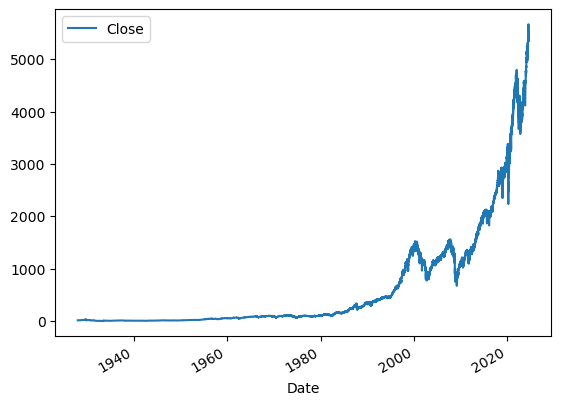

In [72]:
sp500.plot.line(y="Close", use_index=True)

In [73]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [77]:
sp500["Tomorrow"] =sp500["Close"].shift(-1)
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500 = sp500.loc["1990-01-01":].copy()

In [78]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-07-29 00:00:00-04:00,5476.549805,5487.740234,5444.439941,5463.540039,3379970000,5436.439941,0
2024-07-30 00:00:00-04:00,5478.729980,5489.459961,5401.700195,5436.439941,3777740000,5522.299805,1
2024-07-31 00:00:00-04:00,5505.589844,5551.509766,5493.750000,5522.299805,4546910000,5446.680176,0


In [80]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [81]:
from sklearn.metrics import precision_score
import pandas as pd
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5384615384615384

In [82]:
preds

Date
2024-03-12 00:00:00-04:00    0
2024-03-13 00:00:00-04:00    0
2024-03-14 00:00:00-04:00    0
2024-03-15 00:00:00-04:00    0
2024-03-18 00:00:00-04:00    0
                            ..
2024-07-29 00:00:00-04:00    0
2024-07-30 00:00:00-04:00    0
2024-07-31 00:00:00-04:00    0
2024-08-01 00:00:00-04:00    0
2024-08-02 00:00:00-04:00    0
Length: 100, dtype: int32

<Axes: xlabel='Date'>

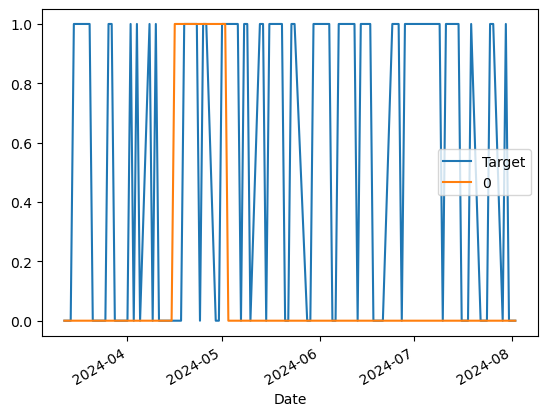

In [83]:
combined= pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [84]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds= model.predict(test[predictors])
    preds= pd.Series(preds, index=test.index, name="Predictions")
    combined= pd.concat([test["Target"],preds], axis=1)
    return combined    

In [85]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions=[]
    for i in range(start, data.shape[0], step):
        train= data.iloc[0:i].copy()
        test= data.iloc[i:(i+step)].copy()
        predictions=predict(test, train, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)    

In [102]:
predictions= backtest(sp500, model, predictors)

In [89]:
predictions["Predictions"].value_counts()

Predictions
1    107073
0     30427
Name: count, dtype: int64

In [91]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5346165700036424

In [92]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.531847
0    0.468153
Name: count, dtype: float64

In [93]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-29 00:00:00-04:00,5476.549805,5487.740234,5444.439941,5463.540039,3379970000,5436.439941,0,1.000406,2.0,1.000475,2.0,1.012012,39.0,1.121462,140.0,1.275940,529.0
2024-07-30 00:00:00-04:00,5478.729980,5489.459961,5401.700195,5436.439941,3777740000,5522.299805,1,0.997514,1.0,0.999881,2.0,1.005836,38.0,1.115112,140.0,1.268992,528.0
2024-07-31 00:00:00-04:00,5505.589844,5551.509766,5493.750000,5522.299805,4546910000,5446.680176,0,1.007835,1.0,1.012129,3.0,1.020480,38.0,1.131787,141.0,1.288381,528.0


In [100]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [101]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
predictions = backtest(sp500, model, new_predictors)
predictions["Predictions"].value_counts()

Predictions
0.0    4374
1.0     839
Name: count, dtype: int64

In [108]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5408878504672897

In [109]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.544792
0    0.455208
Name: count, dtype: float64

In [110]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,0.0
2003-11-18 00:00:00-05:00,1,0.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,0.0
...,...,...
2024-07-29 00:00:00-04:00,0,0.0
2024-07-30 00:00:00-04:00,1,0.0
2024-07-31 00:00:00-04:00,0,0.0
